heatmap stuff- actual vs predicted field strength (pixel value, technically)

3/2/21 edits highly likely as I do this for the midscale_redo family

may-ish 21, ongoing- turns out shit be broke for signed experiments

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
from PIL import Image
from scipy.ndimage import convolve as conv
from tqdm import tqdm
import os

In [2]:
def fits_scale(og_img, normed_img):
    
    unnorm= normed_img*np.std(og_img)
    unnorm=unnorm+np.mean(og_img)

    fits_scaled=unnorm/255
    fits_scaled=fits_scaled*2*2550
    fits_scaled=fits_scaled-2550
    
    return(fits_scaled)


def make_heatmap(target_list, prediction_list, trained_csv, minbin=0, maxbin=False, absval=True, log=True, norm=False):
#make and plot average 2D histogram of target vs prediction pixel values
#6/24/21 (good god I've been at this for a million years) passing trained csv instead of any kind of minmax list so we can get mean and std of original tiff images
    tb_tot=[]
    tb_abs=[]
    tb_pos=[]
    tb_neg=[]
    
    pb_tot=[]
    pb_abs=[]
    pb_pos=[]
    pb_neg=[]
    
    plt.rcParams.update({'font.size': 15})
    plt.rcParams.update({"axes.labelpad":10})
    if maxbin:
        mx=0
        maxes=[]
    if absval:
        bins=100
        r=[0, 2550] 
    else:
        bins=200 #200 should mean we get the same like. range of values per bin as unsigned
        r=[-1100, 1100]
        
    hist_stack = np.empty((bins, bins, 1))
    hist_stack_t = np.empty((bins, 1))
    hist_stack_p = np.empty((bins, 1))
    
    csv=open(trained_csv, 'r').readlines()

    #print(csv)
    for n in range(len(target_list)): 
        
        #fits_min = minmax_list[n][0]
        #fits_max=minmax_list[n][1]
        
        #fits_max=np.amax([-1*fits_min, fits_max])
        #fits_max=2550
        f=csv[n+1].split(',')[1].strip()
        name, ext = os.path.splitext(f)
        #og_target_name='/home/zenalisa/data/50ar_210128/rotate/hmi/'+ name.split('/')[-2]+ '/'+ name.split('/')[-1]+".tiff"
        og_target_name=name.replace('/fs1/project/iip/', '/home/') + ext
        #print(og_target_name)
        og_target_img=np.array(Image.open(og_target_name))
        #plt.figure()
        #plt.imshow(og_target_img, cmap='gray')
        
        fname = target_list[n]
        t_img = np.array(Image.open(fname))
    
        t_img=fits_scale(og_target_img, t_img)
        t_img = np.ndarray.flatten(t_img)
        
        tb_tot.append(np.sum(t_img))
        tb_abs.append(np.sum(abs(t_img)))
        tb_pos.append(np.sum(t_img[t_img>0]))
        tb_neg.append(np.sum(t_img[t_img<0]))
        #t_img=abs(t_img)
        
        if maxbin:
            maxes.append(np.amax(t_img))
        
        #print(np.amin(t_img), np.amax(t_img))
        
        #convert back to fits values
        #t_img = t_img - np.amin(t_img)
        #print(np.amin(t_img), np.amax(t_img))
        #t_img = t_img/np.amax(t_img)
        #print(np.amin(t_img), np.amax(t_img))
        #t_img=t_img* fits_max
        #t_img=t_img+fits_min #I don't even fucking know anymore dude is it too late to change majors
        #print(np.amin(t_img), np.amax(t_img))
        #plt.figure(figsize=(7, 7))
        #plt.imshow(t_img, cmap='gray')

        #kernel = np.ones((5, 5))
        #t_img = conv(t_img, kernel)
        #t_img=resize(t_img, .1) 
        #plt.figure(figsize=(7, 7))
        #plt.imshow(t_img, cmap='gray')
        #t_img = np.ndarray.flatten(t_img) 
        #print(np.amin(t_img), np.amax(t_img))

        fname = prediction_list[n]
        p_img = np.array(Image.open(fname))
        p_img=fits_scale(og_target_img, p_img)
        p_img = np.ndarray.flatten(p_img)
        
        pb_tot.append(np.sum(p_img))
        pb_abs.append(np.sum(abs(p_img)))
        pb_pos.append(np.sum(p_img[p_img>0]))
        pb_neg.append(np.sum(p_img[p_img<0]))
        
        #p_img=abs(p_img)
        
        #print(np.amin(p_img), np.amax(p_img))
        
        #convert back to fits values
        #p_img = p_img - np.amin(p_img)
        #print(np.amin(p_img), np.amax(p_img))
        #p_img = p_img/np.amax(p_img)
        #print(np.amin(p_img), np.amax(p_img))
        #p_img=p_img* fits_max
        #p_img=p_img+fits_min
        #print(np.amin(p_img), np.amax(p_img))
        #print(np.amin(p_img), np.amax(p_img))
        #p_img = conv(p_img, kernel)
        #p_img=resize(p_img, .1)
        #p_img = np.ndarray.flatten(p_img)
        #print(np.amin(p_img), np.amax(p_img))
        #print(p_img.size)
        
        #print(np.amin(p_img), np.amax(p_img), np.amin(t_img), np.amax(t_img))
        #print(np.where(p_img>10)[0])
        #print(p_img.size)
        
        #p_img=p_img[t_img>0]
        #t_img=t_img[t_img>0]
        
        #print(p_img.size)
        #raise KeyError
        
        #if norm:
        #    H, x, y = np.histogram2d(t_img, p_img, bins=bins, range=[r, r], normed=True)
        #    H_t, w = np.histogram(t_img, bins=bins)#, range=[r, r], normed=True)
        #    H_p, w = np.histogram(p_img, bins=bins)#, range=[r, r], normed=True)
        #else:
        #    H, x, y = np.histogram2d(t_img, p_img, bins=bins, range=[r, r])#, normed=True)
        #    H_t, w = np.histogram(t_img, bins=bins)#, range=[r, r])
        #    H_p, w = np.histogram(p_img, bins=bins)#, range=[r, r])
        
        #H = np.reshape(H, (bins, bins, 1))
        #H_t=np.reshape(H_t, (bins, 1))
        #H_p=np.reshape(H_p, (bins, 1))
        #hist_stack = np.concatenate((hist_stack, H), axis=2)
        #hist_stack_t = np.concatenate((hist_stack_t, H_t), axis=1)
        #hist_stack_p = np.concatenate((hist_stack_p, H_p), axis=1)
        #print(x, y)

    
    plt.figure(figsize=(11, 10))
    
    plt.subplot(221)
    plt.scatter(tb_tot, pb_tot)
    plt.xlim(-1e7, 1.3e7)
    plt.ylim(-1e7, 1.3e7)
    plt.plot(range(int(-2e7), int(2e7)), range(int(-2e7), int(2e7)), 'r--')
    plt.xlabel('target')
    plt.ylabel('predicted')
    plt.title('B_total')
    
    plt.subplot(222)
    plt.scatter(tb_abs, pb_abs)
    plt.xlim(0, 2.5e7)
    plt.ylim(0, 2.5e7)
    plt.plot(range(int(-2e7), int(2e7)), range(int(-2e7), int(2e7)), 'r--')
    plt.xlabel('target')
    plt.ylabel('predicted')
    plt.title('B_abs')
    
    plt.subplot(223)
    plt.scatter(tb_pos, pb_pos)
    plt.xlim(0, 1.25e7)
    plt.ylim(0, 1.25e7)
    plt.plot(range(int(-2e7), int(2e7)), range(int(-2e7), int(2e7)), 'r--')
    plt.xlabel('target')
    plt.ylabel('predicted')
    plt.title('B_pos')
    
    plt.subplot(224)
    plt.scatter(tb_neg, pb_neg)
    plt.xlim(-.5e7, .5e7)
    plt.ylim(-.5e7, .5e7)
    plt.plot(range(int(-2e7), int(2e7)), range(int(-2e7), int(2e7)), 'r--')
    plt.xlabel('target')
    plt.ylabel('predicted')
    plt.title('B_neg')
    
    plt.tight_layout()
    
    return
    
    
    
    
    
    hist_stack = hist_stack[:, :, 1:]
    hist_stack_t = hist_stack_t[:, 1:]
    hist_stack_p = hist_stack_p[:, 1:]
  
    
    
    #print(hist_stack.shape)
    
    if maxbin:
        mx=np.mean(maxes)
        diffs=[abs(x - mx)]
        mindiff=np.amin(diffs)
        #print(mindiff)
        maxbin = np.where(diffs == mindiff)[1][0]
        #print(x[max_bin])
        #raise KeyError
        minbin=int(float(minbin)/100*maxbin)
            #print(minbin)
            #raise KeyError
    else:
        maxbin=bins
    
    
    if log:
        avg_hist = np.log10(np.mean(hist_stack, axis=2)+1)
    else:
        avg_hist = np.mean(hist_stack, axis=2)
    #print(avg_hist)
    
    #plt.figure(figsize=(10, 5))
    #plt.subplot(121)
    #plt.bar(range(bins-10), np.ndarray.flatten(np.mean(hist_stack_t, axis=1))[10:])
    #plt.subplot(122)
    #plt.bar(range(bins-10), np.ndarray.flatten(np.mean(hist_stack_p, axis=1))[10:])
    
    #plt.figure(figsize=(10,10))
    #print(avg_hist.shape)
    
    
    #avg_hist[90:110, 90:110]=0

    #minbin=50
    plt.imshow(avg_hist[minbin:maxbin, minbin:maxbin], origin='low')#, vmax=.5)
    plt.colorbar()
    plt.plot(range(maxbin-minbin-1), range(maxbin-minbin -1), 'w--')
    plt.xlabel('Target field strength (G)')
    plt.ylabel('Predicted field strength (G)')
    step=5
    #plt.xticks(range(0, bins-minbin, 5), np.round(x[minbin::step], 2), rotation=90)
    #plt.yticks(range(0, bins-minbin, 5), np.round(y[minbin::step], 2))
    if abs:
        #plt.xticks(range(0, bins-minbin, 5), np.round(x[minbin::step], 2), rotation=90)
        #plt.yticks(range(0, bins-minbin, 5), np.round(y[minbin::step], 2))
        plt.xticks(range(0, maxbin-minbin, 5), np.round(x[minbin::step], 2), rotation=90)
        plt.yticks(range(0, maxbin-minbin, 5), np.round(y[minbin::step], 2))
    
    else:
        plt.xticks(range(0, bins-minbin, 5), np.round(x[minbin::step], 2), rotation=90)
        plt.yticks(range(0, bins-minbin, 5), np.round(y[minbin::step], 2))
        #plt.xticks(range(r[0]+minbin, r[1]-minbin))#, np.round(x[minbin::step], 2), rotation=90)
        #plt.yticks(range(r[0]+minbin, r[1]-minbin))#, np.round(y[minbin::step], 2))
    #print(x)


In [3]:
def compare_flux(target_list, prediction_list, trained_csv, absval=False):
#make and plot average 2D histogram of target vs prediction pixel values
#6/24/21 (good god I've been at this for a million years) passing trained csv instead of any kind of minmax list so we can get mean and std of original tiff images
    tb_tot=[]
    tb_abs=[]
    tb_pos=[]
    tb_neg=[]
    
    pb_tot=[]
    pb_abs=[]
    pb_pos=[]
    pb_neg=[]
    
    plt.rcParams.update({'font.size': 15})
    plt.rcParams.update({"axes.labelpad":10})
    
    csv=open(trained_csv, 'r').readlines()

    #print(csv)
    for n in range(len(target_list)): 
        
        f=csv[n+1].split(',')[1].strip()
        name, ext = os.path.splitext(f)
        #og_target_name='/home/zenalisa/data/50ar_210128/rotate/hmi/'+ name.split('/')[-2]+ '/'+ name.split('/')[-1]+".tiff"
        og_target_name=name.replace('/fs1/project/iip/', '/home/') + ext
        #print(og_target_name)
        og_target_img=np.array(Image.open(og_target_name))
        #plt.figure()
        #plt.imshow(og_target_img, cmap='gray')
        
        fname = target_list[n]
        t_img = np.array(Image.open(fname))
    
        t_img=fits_scale(og_target_img, t_img)
        t_img = np.ndarray.flatten(t_img)
        
        tb_tot.append(np.sum(t_img))
        tb_abs.append(np.sum(abs(t_img)))
        tb_pos.append(np.sum(t_img[t_img>0]))
        tb_neg.append(np.sum(t_img[t_img<0]))
        


        fname = prediction_list[n]
        p_img = np.array(Image.open(fname))
        p_img=fits_scale(og_target_img, p_img)
        p_img = np.ndarray.flatten(p_img)
        
        pb_tot.append(np.sum(p_img))
        pb_abs.append(np.sum(abs(p_img)))
        pb_pos.append(np.sum(p_img[p_img>0]))
        pb_neg.append(np.sum(p_img[p_img<0]))


    
    plt.figure(figsize=(10, 10))
    
    if not absval:
        mn=min(np.amin(tb_tot), np.amin(pb_tot))
        mx=max(np.amax(tb_tot), np.amax(pb_tot))
        plt.subplot(221)
        plt.scatter(tb_tot, pb_tot)
        plt.xlim(mn-3e6, mx+3e6)
        plt.ylim(mn-3e6, mx+3e6)
        plt.plot(range(int(mn-3e6), int(mx+3e6), int(1e5)), range(int(mn-3e6), int(mx+3e6), int(1e5)), 'r--')
        plt.xlabel('target')
        plt.ylabel('predicted')
        plt.title('B_total')

        mn=min(np.amin(tb_abs), np.amin(pb_abs))
        mx=max(np.amax(tb_abs), np.amax(pb_abs))
        plt.subplot(222)
        plt.scatter(tb_abs, pb_abs)
        plt.xlim(mn-3e6, mx+3e6)
        plt.ylim(mn-3e6, mx+3e6)
        plt.plot(range(int(mn-3e6), int(mx+3e6), int(1e5)), range(int(mn-3e6), int(mx+3e6), int(1e5)), 'r--')
        plt.xlabel('target')
        plt.ylabel('predicted')
        plt.title('B_abs')

        mn=min(np.amin(tb_pos), np.amin(pb_pos))
        mx=max(np.amax(tb_pos), np.amax(pb_pos))
        plt.subplot(223)
        plt.scatter(tb_pos, pb_pos)
        plt.xlim(mn-3e6, mx+3e6)
        plt.ylim(mn-3e6, mx+3e6)
        plt.plot(range(int(mn-3e6), int(mx+3e6), int(1e5)), range(int(mn-3e6), int(mx+3e6), int(1e5)), 'r--')
        plt.xlabel('target')
        plt.ylabel('predicted')
        plt.title('B_pos')

        mn=min(np.amin(tb_neg), np.amin(pb_neg))
        mx=max(np.amax(tb_neg), np.amax(pb_neg))
        #mn=-.8e7
        #mx=.8e7
        plt.subplot(224)
        plt.scatter(tb_neg, pb_neg)
        plt.xlim(mn-3e6, mx+3e6)
        plt.ylim(mn-3e6, mx+3e6)
        plt.plot(range(int(mn-3e6), int(mx+3e6), int(1e5)), range(int(mn-3e6), int(mx+3e6), int(1e5)), 'r--')
        #plt.plot(range(int(-1e7), int(mx+3e6), int(1e5)), range(int(-1e7), int(mx+3e6), int(1e5)), 'r--')
        plt.xlabel('target')
        plt.ylabel('predicted')
        plt.title('B_neg')

        plt.tight_layout()

    else:
        
        plt.figure(figsize=(5, 5))
        mn=min(np.amin(tb_abs), np.amin(pb_abs))
        mx=max(np.amax(tb_abs), np.amax(pb_abs))
        #plt.subplot(222)
        plt.scatter(tb_abs, pb_abs)
        plt.xlim(mn-3e6, mx+3e6)
        plt.ylim(mn-3e6, mx+3e6)
        plt.plot(range(int(mn-3e6), int(mx+3e6), int(1e5)), range(int(mn-3e6), int(mx+3e6), int(1e5)), 'r--')
        plt.xlabel('target')
        plt.ylabel('predicted')
        #plt.title('B_abs')
    
    

# The important part

In [7]:

def file_order(fname):
    return(int(fname.split('/')[-2]))

#location='/home/zenalisa/data/output/newARs'
location='/home/zenalisa/data/output/inthesis/midscale_redo_neither_rotate'
modelname='midscale_redo_neither_rotate'

target_path = location+'/*/target.tiff'
signal_path = location+'/*/signal.tiff'
prediction_path = location+'/*/prediction_'+modelname+'.tiff'

target_list = glob.glob(target_path)
target_list.sort()
#print(target_list)
signal_list = glob.glob(signal_path)
signal_list.sort()
prediction_list = glob.glob(prediction_path)
prediction_list.sort()

print len(target_list)
print len(prediction_list)
target_list_trained=target_list
prediction_list_trained=prediction_list

target_list_trained.sort(key=file_order) #makes sure order of files matches test_list_whatever.csv, glob puts it in string order instead 
prediction_list_trained.sort(key=file_order)
#print(target_list_trained)

#-------------------------------------------------
new_location=location+'/new'
#new_location=location.replace('trained', 'new')

#location='/home/zenalisa/data/output/190806'


target_path = new_location+'/*/target.tiff'
signal_path = new_location+'/*/signal.tiff'
prediction_path = new_location+'/*/prediction_'+modelname+'.tiff'

target_list_new = glob.glob(target_path)
target_list_new.sort()
signal_list_new = glob.glob(signal_path)
signal_list_new.sort()
prediction_list_new = glob.glob(prediction_path)
prediction_list_new.sort()

print len(target_list_new)
print(len(prediction_list_new))
#target_list_new=target_list
#prediction_list_new=prediction_list


target_list_new.sort(key=file_order)
prediction_list_new.sort(key=file_order)

#for t in target_list_new:
#    print(t)



499
499
500
500


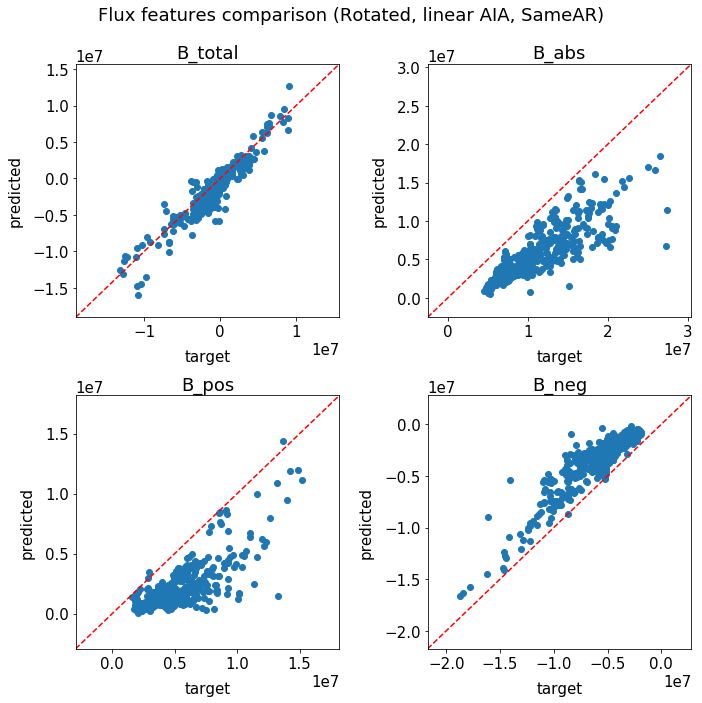

In [8]:
trained_csv='/home/zenalisa/data/output/inthesis/'+modelname+'/predictions.csv'
#test_new = open('/home/zenalisa/data/test_list_1hem_210318neither_new.csv', 'r') 
#test_trained = open(trained_csv, 'r')
mb=0
compare_flux(target_list, prediction_list, trained_csv)#, minbin=mb, maxbin=False, absval=False, log=True, norm=False)
plt.suptitle('Flux features comparison (Rotated, linear AIA, SameAR)');
plt.subplots_adjust(top=0.9);
#make_heatmap(target_list_new, prediction_list_new, new_minmax, minbin=mb, abs=False)
#plt.title('52AR (linear/rotated), Test B')



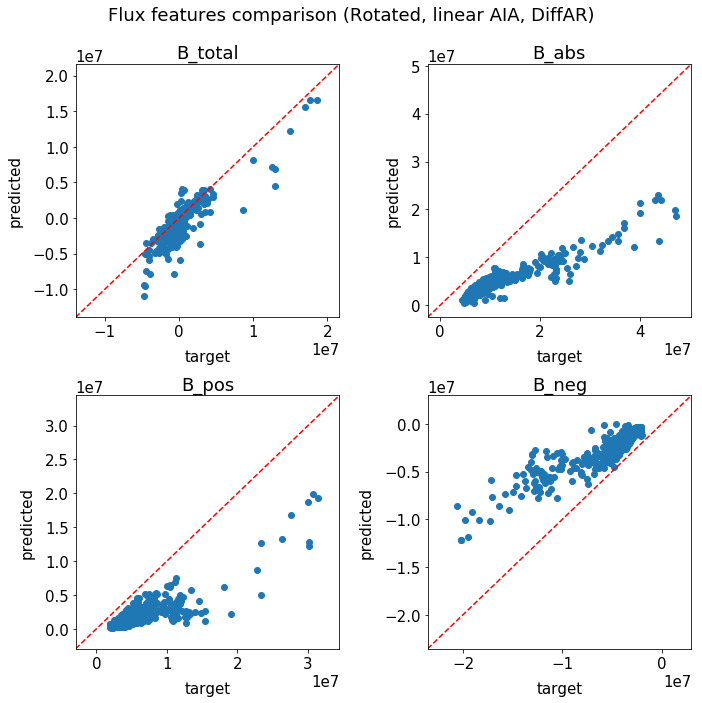

In [9]:
trained_csv='/home/zenalisa/data/output/inthesis/'+modelname+'/new/predictions.csv'
#test_new = open('/home/zenalisa/data/test_list_1hem_210318neither_new.csv', 'r') 
#test_trained = open(trained_csv, 'r')
mb=0
compare_flux(target_list_new, prediction_list_new, trained_csv)#, minbin=mb, maxbin=False, absval=False, log=True, norm=False)
plt.suptitle('Flux features comparison (Rotated, linear AIA, DiffAR)');
plt.subplots_adjust(top=0.9);
#make_heatmap(target_list_new, prediction_list_new, new_minmax, minbin=mb, abs=False)
#plt.title('52AR (linear/rotated), Test B')



### below this is assorted testing and fuckery

In [4]:
mx_trained=0
mx_new=0
mn_trained=2550
mn_new=2550
for f in target_list_trained:
    img=np.array(Image.open(f))
    if np.amax(img)>mx_trained:
        mx_trained=np.amax(img)
    if np.amin(img)<mn_trained:
        mn_trained=np.amin(img)
        
        
for f in target_list_new:
    img=np.array(Image.open(f))
    if np.amax(img)>mx_new:
        mx_new=np.amax(img)
    if np.amin(img)<mn_new:
        mn_new=np.amin(img)
        
print(mx_trained, mn_trained) #I straight up have no fucking idea what's going on but this seems. closer to right. idk
print(mx_new, mn_new)
trained_minmax=[mn_trained, mx_trained]
new_minmax=[mn_new, mx_new]

(68.26513, -65.54579)
(75.44844, -55.256893)


#for small scale stuff, shouldn't need again? moved and markdown-ified 3/2/21
#-------------------------------------------------
location='/home/zenalisa/data/output/smallrun/1131_all3'
#location='/home/zenalisa/data/output/190806'


target_path = location+'/*/target.tiff'
signal_path = location+'/*/signal.tiff'
prediction_path = location+'/*/prediction_smallrun_1131.tiff'

target_list = glob.glob(target_path)
target_list.sort()
signal_list = glob.glob(signal_path)
signal_list.sort()
prediction_list = glob.glob(prediction_path)
prediction_list.sort()

print len(target_list)
target_list_new=target_list
prediction_list_new=prediction_list

#target_list_small_trained=target_list[:3]
#target_list_small_new=target_list[3:]
#prediction_list_small_trained=prediction_list[:3] #trained AR's
#prediction_list_small_new=prediction_list[3:] #new AR's



hey maybe make sure the drive is mounted before you run this block

### Where you left off (3/2): 
need a way to make sure the order of target_list_trained et al matches the order of the minmax list. It might already, depending on how glob is acting? but? you'd better make damn sure because if it's not, everything will get real fucky

also I think I got rid of the weird lines (looked like an exact copy of the unfair smallscale results?) in the new heatmap but yknow. lots of exploring a double checking to do here

In [21]:
#find mins and maxes of all the fits versions of the images, to convert back to Gauss values.
#this is one mistake that I don't feel bad about making early and now having to fix way later because, like,
#literally who would have predicted I'd need this, wtf

#3/2/21 ok ok now I have the biglist with mins and maxes still attached... should probs use that instead? Maybe don't run this yet?
#3/2/21 nvm I didn't actually save the fits mins and maxes, just use this block
import os
from astropy.io import fits
trained_csv='/home/zenalisa/data/test_list_1hem_210318neither.csv'
test_new = open('/home/zenalisa/data/test_list_1hem_210318neither_new.csv', 'r') 
test_trained = open(trained_csv, 'r')
signed=True #flag for hmi data

#target_list_trained=[], prediction_list_trained=[]
#target_list_new=[], prediction_list_new=[]

new_minmax_list = []
trained_minmax_list = []
fits_loc = '/mnt/zena/active_regions/'

for f in tqdm(test_new.readlines()):
    try:
        fname=f.split(',')[1].strip()
    except IndexError:
        print('new ,' + f)
        continue
    #print(fname)    
    if fname=='path_target':
        continue
    
    name, ext = os.path.splitext(fname)
    fits_fname = fits_loc +  name.split('/')[-2]+ '/'+ name.split('/')[-1]+".fits"
    #print(fits_fname)
    #break
    fits_img = fits.open(fits_fname)
   # break
    fits_img.verify('fix') 
    
    if signed:
        fits_data=fits_img[1].data
    else:
        fits_data = abs(fits_img[1].data)
        
    mx=fits_data.max()#since we clipped to this when converting the data to tiff, will do that again
    if mx > 2550:
        mx= 2550
    
    mn=fits_data.min()
    if mn < -2550:
        mn= -2550
    
    new_minmax_list.append([mn, mx])
    #break
#raise KeyError
#----------------------------------------------------------
for f in tqdm(test_trained.readlines()):
    try:
        fname=f.split(',')[1].strip()
    except IndexError:
        print('trained ,' + f)
        continue    
    if fname=='path_target':
        continue
    
    name, ext = os.path.splitext(fname)
    fits_fname = fits_loc +  name.split('/')[-2]+ '/'+ name.split('/')[-1]+".fits"
    #print(fits_fname)
    #break
    fits_img = fits.open(fits_fname)
   # break
    fits_img.verify('fix') 
    if signed:
        fits_data=fits_img[1].data
    else:
        fits_data = abs(fits_img[1].data)
    
    mx=fits_data.max()#since we clipped to this when converting the data to tiff, will do that again
    if mx > 2550:
        mx= 2550
    
    mn=fits_data.min()
    if mn < -2550:
        mn= -2550
    trained_minmax_list.append([mn, mx])
    #break

    
#-------------------------------------------------------------------   
print(len(trained_minmax_list), len(new_minmax_list))
    

100%|██████████| 518/518 [00:22<00:00, 23.02it/s]

(517, 514)


/fs1/project/iip/zenalisa/data/50ar_210128/rotate/hmi/1156/hmi.M_720s.20110209_151200_TAI.1.magnetogram.tiff
/home/zenalisa/data/50ar_210128/rotate/hmi/1156/hmi.M_720s.20110209_151200_TAI.1.magnetogram.tiff
(-25.781603, 22.86432)
(-20.012217230467076, 21.67811061839791)
(53.3936, 193.41435)
(-1482.128, 1318.2869)
(-1149.9999999999998, 1250.0)
(-1140.8, 1246.1000000000001)


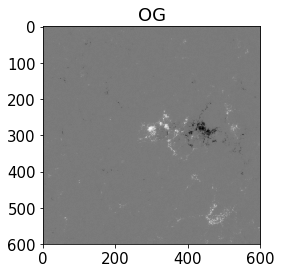

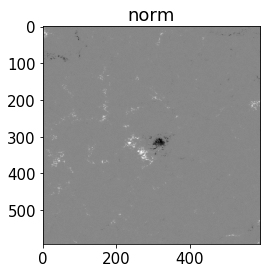

In [19]:
#testing some conversion shit (instead of throwing things, which is my first choice for a way to address this)
#test_new = open('/home/zenalisa/data/rotate_lists/test_list_50ar_210128_new_rotate.csv', 'r') 
#test_trained = open('/home/zenalisa/data/rotate_lists/test_list_50ar_210128_rotate.csv', 'r')

trained_normlist=[] #some means and std's from original target images (before the network went and normed it all to hell)
new_normlist=[]

#print(target_list[0])
#test_trained = open('/home/zenalisa/data/rotate_lists/test_list_50ar_210128_rotate.csv', 'r')
f=test_trained.readlines()[1].split(',')[1].strip()
print(f)
name, ext = os.path.splitext(f)
tiff_og_name='/home/zenalisa/data/50ar_210128/rotate/hmi/'+ name.split('/')[-2]+ '/'+ name.split('/')[-1]+".tiff"
print(tiff_og_name)
fits_fname = fits_loc +  name.split('/')[-2]+ '/'+ name.split('/')[-1]+".fits"
#print(fits_fname)

tiff_norm=np.array(Image.open(target_list_trained[0]))
tiff_og=np.array(Image.open(tiff_og_name))

plt.imshow(tiff_og, cmap='gray')
plt.title('OG')
plt.figure()
plt.imshow(tiff_norm, cmap='gray')
plt.title('norm');

print(np.amin(tiff_norm), np.amax(tiff_norm))
fits_img = fits.open(fits_fname)
fits_img.verify('fix') 
fits_data=fits_img[1].data

tiff_og=tiff_og.astype(np.float64)
tiff_renorm=tiff_og-np.mean(tiff_og)
tiff_renorm=tiff_renorm/np.std(tiff_og)
print(np.amin(tiff_renorm), np.amax(tiff_renorm))

tiff_unnorm= tiff_norm*np.std(tiff_og)
tiff_unnorm=tiff_unnorm+np.mean(tiff_og)
print(np.amin(tiff_unnorm), np.amax(tiff_unnorm))

fits_scale=tiff_unnorm/255
fits_scale=fits_scale*2*2550
fits_scale=fits_scale-2550

fits_scale_og=tiff_og.astype(float)/255
fits_scale_og=fits_scale_og*2*2550
fits_scale_og=fits_scale_og-2550

print(np.amin(fits_scale), np.amax(fits_scale))
print(np.amin(fits_scale_og), np.amax(fits_scale_og))
print(np.amin(fits_data), np.amax(fits_data))


#sweet baby jesus h fucking christ on a cracker and every other expletive in the book 
#why was that not what I did in the first place and is it too late to just drop out of grad school

#do all that ^ again but for the smallscale data
test = open('/home/zenalisa/data/smallrun/tiff/test_list_all3_copy.csv', 'r')
smallscale_minmax_list = []
fits_loc = '/mnt/zena/active_regions/'

for f in test.readlines():
    try:
        fname=f.split(',')[1].strip()
    except IndexError:
        print(f)
        continue
    #print(fname)    
    if fname=='path_target':
        continue
    
    name, ext = os.path.splitext(fname)
    fits_fname = fits_loc +  name.split('/')[-2]+ '/'+ name.split('/')[-1]+".fits"
    #print(fits_fname)
    #break
    fits_img = fits.open(fits_fname)
    #break
    fits_img.verify('fix') 
    fits_data = abs(fits_img[1].data)
    
    smallscale_minmax_list.append([fits_data.min(), fits_data.max()])
    #break
print(len(smallscale_minmax_list))

print(smallscale_minmax_list[5])
small_minmax_trained = smallscale_minmax_list[:3]
small_minmax_new = smallscale_minmax_list[3:]

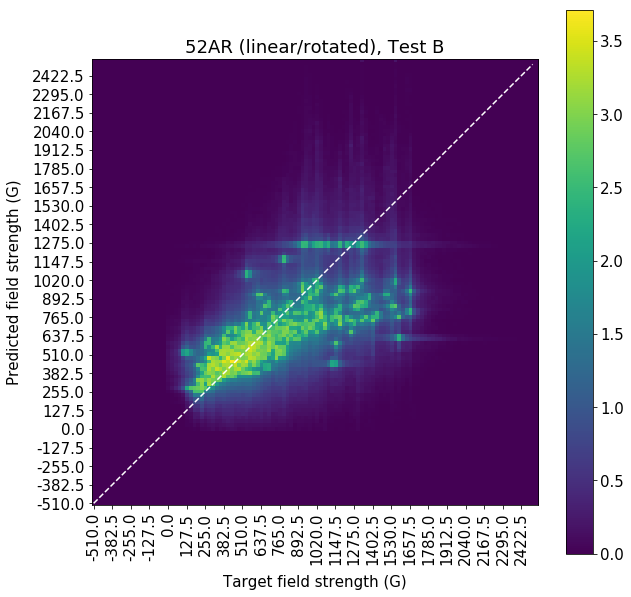

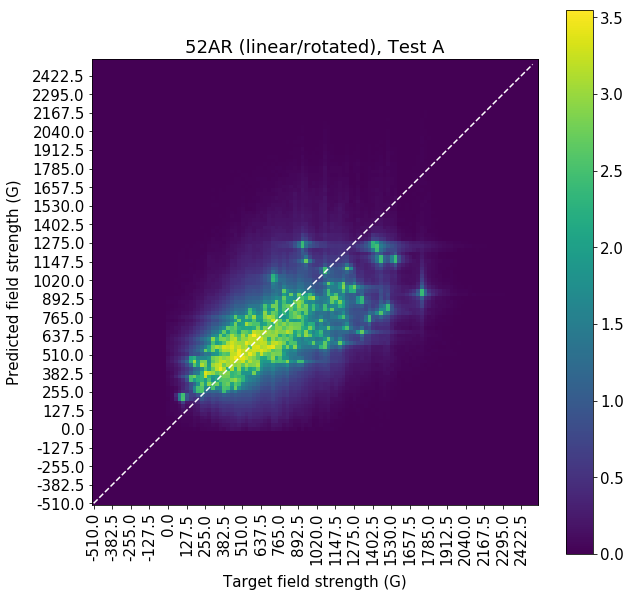

In [37]:
mb=80
make_heatmap(target_list_new, prediction_list_new, new_minmax_list, minbin=mb, abs=False)
plt.title('52AR (linear/rotated), Test B')
make_heatmap(target_list_trained, prediction_list_trained, trained_minmax_list, minbin=mb, abs=False)
plt.title('52AR (linear/rotated), Test A');

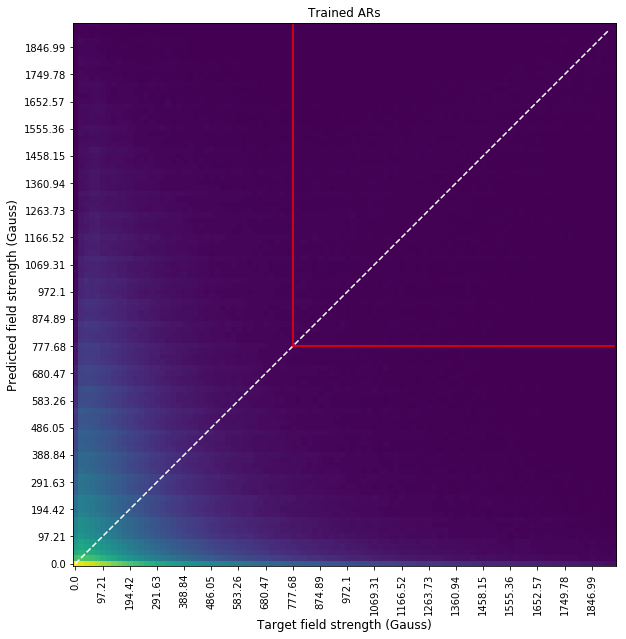

In [16]:
#for making the red line box at mb, will probs use later
mb = 0
make_heatmap(target_list_trained[:299], prediction_list_trained[:299], trained_minmax_list[:299], minbin=mb)
mb = 40
plt.title('Trained ARs')
plt.plot(range(mb,100), mb*np.ones(100-mb), 'r')
plt.plot(mb*np.ones(100-mb),range(mb,100),  'r')


Text(0.5,1,'New ARs')

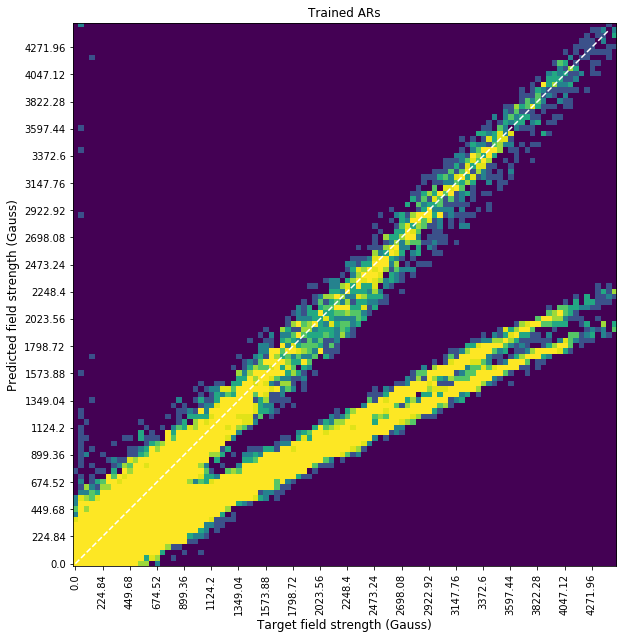

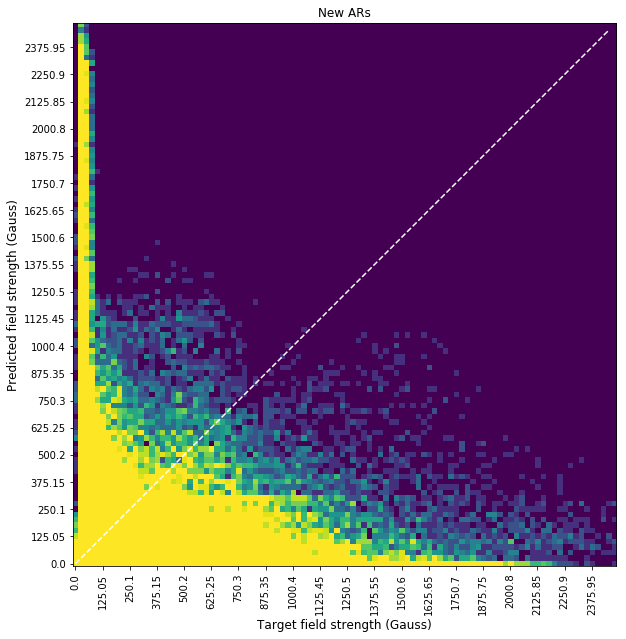

In [31]:
mb = 0
make_heatmap(target_list_small_trained, prediction_list_small_trained, small_minmax_trained, minbin=mb)
plt.title('Trained ARs')
make_heatmap(target_list_small_new, prediction_list_small_new, small_minmax_new, minbin=mb)
plt.title('New ARs')